# 【課題１】データの取得

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"])

In [2]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


# 【課題2】データの結合

In [4]:
#横方向にデータを結合する
df = pd.concat([X,y],axis=1)

# 【課題3】データの確認

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.isnull().any(axis=0)

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

全てのラベルのサンプル数の合計は150
特徴量に欠損値はない。
平均、標準偏差、四分位数は上記の通り。

# 【課題4】データの調査

あやめには、0:セトナ(setosa)、1:バーシクル(versicolor)、 2:バージニカ(virginica)の種類があり、
このあやめの品種(因子A)について，各々50標本ずつ，「がく片」と「花びら」の長さと幅を測定している。
判別分析，クラスター分析などの研究に使用される。

Sepal.Length: がく片の長さ
Sepal.Width : がく片の幅
Petal.Length: 花びらの長さ
Petal.Width : 花びらの幅


https://archive.ics.uci.edu/ml/datasets/Iris

# 【課題５】必要なデータを抽出

### spepal_widthの列を3つの異なる方法で抽出する

In [10]:
df['sepal width (cm)'].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [11]:
df.loc[:,['sepal width (cm)']].head()

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [12]:
df.iloc[:,1].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

### 50番目から99番目のデータを抽出する

In [13]:
df.loc[51:100].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1


### petal_lengthの列の50番目から99番目までのデータを抽出する

In [14]:
df.loc[51:100,['petal width (cm)']].head()

,petal width (cm)
51,1.5
52,1.5
53,1.3
54,1.5
55,1.3


In [15]:
df[df['petal width (cm)'] == 0.2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### .locと.ilocの違い

.locは行ラベルや列ラベルを用いるが、.ilocは行番号、列番号を用いてデータ加工を行う

# 【課題6】図の作成

### ラベルごとのサンプル数を円グラフにする

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5C71F6CF8>],
      dtype=object)

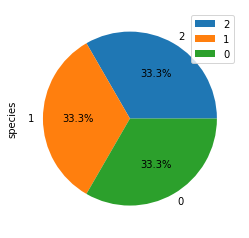

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_species_samples = pd.DataFrame(df['species'].value_counts())
df_species_samples.plot.pie(subplots=True,autopct="%1.1f%%")



#plt.pie(df_species_samples['species'],autopct="%1.1f%%")

### 特徴量を一つ選び、boxplotを使ってラベルごとのデータの分布を可視化する →sepal length (cm)

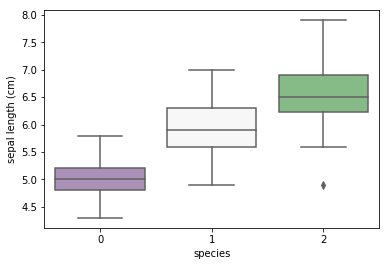

In [17]:
import seaborn as sns
sns.boxplot(x='species',y='sepal length (cm)', data=df, palette='PRGn')

### 特徴量を一つ選び、violinplotを使ってラベルごとのデータの分布を可視化する

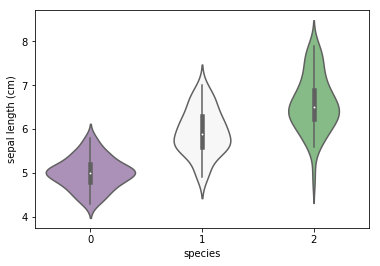

In [18]:
sns.violinplot(x='species',y='sepal length (cm)', data=df, palette='PRGn')

### boxplotとviolinplotはどう違い、それぞれどのような利点があるのか

２種類のカテゴリデータを含んだ数値データの違いを可視化する点は共通。

boxplotは箱ひげ図として表示し、真ん中の線は中央値，箱の上下はそれぞれ第１・第３四分位点、
ヒゲの上下はそれぞれ最大・最小値になります．上下の点は，第1・第３四分位点から判断した場合の「外れ値」を意味するなど、
データの各指標を確認しやすい。

対して、violinplotはデータを分布として表現したもので、各タイプのデータに複数の山(多峰性)を観測することができる。

# 【課題7】特徴量間の関係の確認

### 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

C:\Users\kohei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


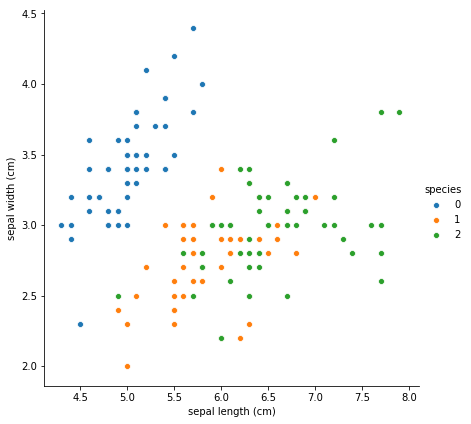

In [30]:
sns.pairplot(df, hue='species',size=6,
             x_vars=['sepal length (cm)'], y_vars=['sepal width (cm)'])

C:\Users\kohei\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


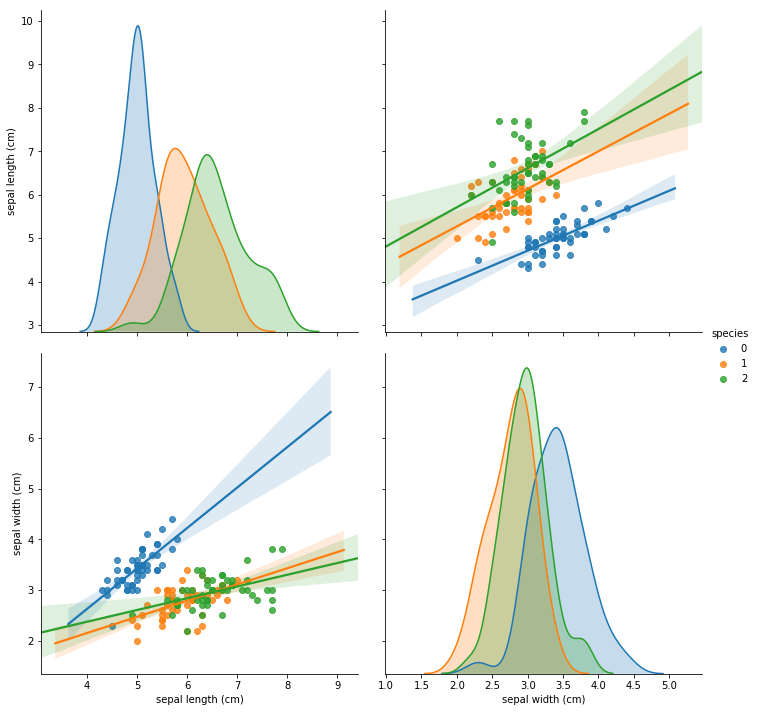

In [31]:
sns.pairplot(df, hue='species',size=5,kind='reg',
             vars=['sepal length (cm)','sepal width (cm)'])

### 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

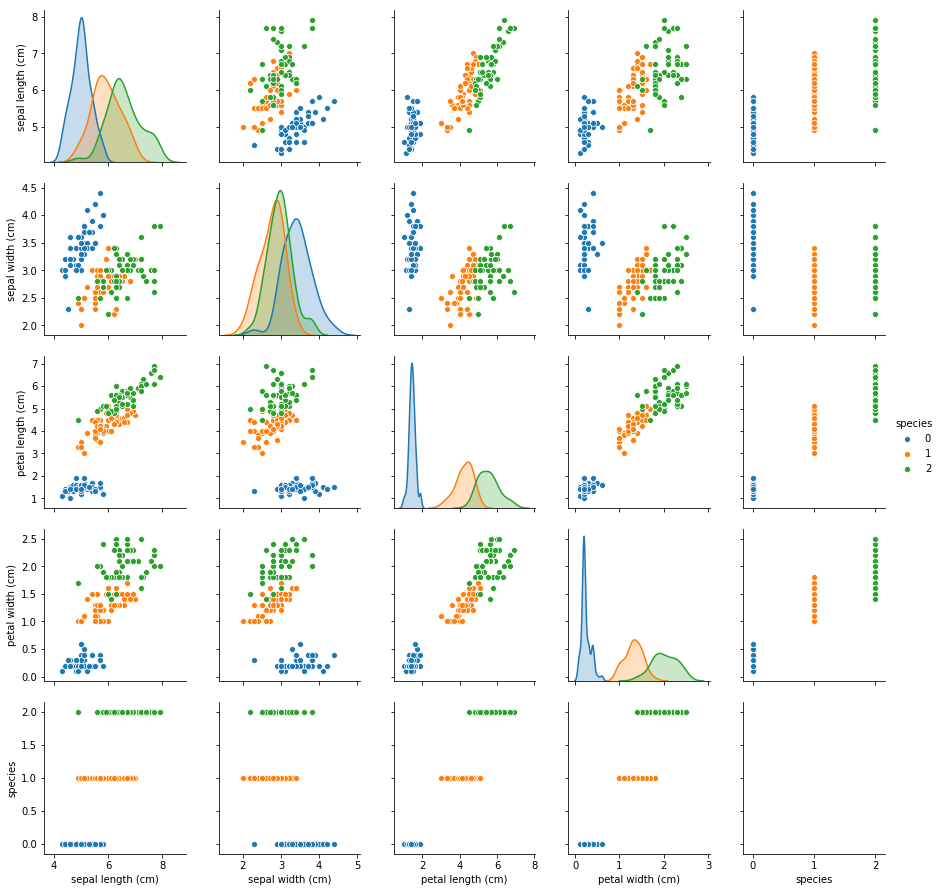

In [23]:
sns.pairplot(data=df, hue="species")

### ４つの特徴量に関する相関係数行列を作る

'pearson': ピアソンの積率相関係数（デフォルト）
'kendall': ケンドールの順位相関係数
'spearman': スピアマンの順位相関係数

In [41]:
df_corr = df.corr(method='pearson')
df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


### 相関係数行列のヒートマップを作る

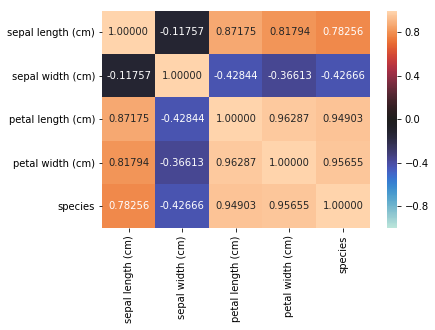

In [42]:
sns.heatmap(df_corr,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.5f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )

# 【課題8】簡単な考察

アヤメの種類を見分けるにあたり、花びらの長さ、幅が重要な分類指標となりそうなことが推測される。
作成したヒートマップにおける品種との相関係数絶対値が大きく、かつ散布図行列を確認しても、両指数の大きさが概ね、
品種の識別に役立ちそうなことがわかる。
一方、がく片の長さ、幅に関しても、セトナの分類には十分活用できそうである。